### Heatmaps for Hyb-capture output

In [2]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Getting read counts from bams of reads bowtie'd to baits

In [ ]:
#get list of targets and lengths from bam file 1
samtools idxstats my_first.bam | cut -f1,2 > targets

# get reads per target from all bam files
ls *.bam > bam_files
while read f ; do samtools idxstats "$f" |grep -v "^\*" | awk '{ depth=125*$3/$2} {print depth}' | sort > "$f"_rc.txt ; done < bam_files
paste targets *_rc.txt > all_rc.txt

# Make header
xargs <bam_files printf ' , %s' | cut -c4-  > bams
sed 's/^/Target, Length, /' bams > header

#Assemble cvs file
cat header all_rc.txt > My_capture.csv




#### Heat maps for Ipomoeae data

In [158]:
df = pd.read_csv('../Datasets/Ipomoeae_capture.csv', index_col=0)
df.head(3)

,length,OXF1071_S29,OXF1147_S30,OXF1623_S50,OXF2544_S53,OXF936_S52,OXF939_S51,RC01_S1,RC04_S2,RC05_S26,...,RC82_S23,RC85_S48,RC87_S24,RC88_S25,RC89_S3,RC90_S27,RC91_S28,RC92_S49,sum,Unnamed: 56
I_lacunosa-Solyc01g100170.2.1_1,4190,266,935299,5565,3132,216,1480,153035,604754,1360304,...,23408,1058,5783,161830,0,1243,4097,0,7272890.0,NaN
I_lacunosa-Solyc09g091900.2.1_1,2578,1875,3145,2765,2880,624,0,67314,830,548,...,50195,296,247873,1383,0,312,1353,0,2551361.0,NaN
I_lacunosa-Solyc09g092070.2.1_1,6788,9529,1201,69350,2461,358,880,520687,205968,876,...,172624,120869,2551,840,0,9372,3397,0,3582670.0,NaN


In [159]:
df.tail(3)

,length,OXF1071_S29,OXF1147_S30,OXF1623_S50,OXF2544_S53,OXF936_S52,OXF939_S51,RC01_S1,RC04_S2,RC05_S26,...,RC82_S23,RC85_S48,RC87_S24,RC88_S25,RC89_S3,RC90_S27,RC91_S28,RC92_S49,sum,Unnamed: 56
I_lacunosa-Solyc01g080360.2.1_1,3876,860,243832,4807,4213,678,308,11314,5375,7247,...,4157,0,15012,39237,110,2495,167287,0,2669801.0,NaN
I_lacunosa-Solyc04g053080.2.1_1,1142,0,6606,3448,1200,0,906,268785,4304,572,...,50607,582831,804,235565,0,0,1810,0,4459492.0,NaN
NaN,1504051,15496338,51136196,45632134,24471432,10364969,1302302,49468203,50537648,37652964,...,33106397,4271330,24902861,17797582,441347,4816999,6865307,50003,NaN,NaN


In [160]:
df = df.drop(columns=['sum', 'Unnamed: 56', 'length'])

In [161]:
df = df.drop(df.index[388])

In [162]:
df.tail(3)

,OXF1071_S29,OXF1147_S30,OXF1623_S50,OXF2544_S53,OXF936_S52,OXF939_S51,RC01_S1,RC04_S2,RC05_S26,RC09_S4,...,RC79_S47,RC81_S22,RC82_S23,RC85_S48,RC87_S24,RC88_S25,RC89_S3,RC90_S27,RC91_S28,RC92_S49
I_lacunosa-Solyc00g006800.2.1_1,242,224932,158915,4093,1258,0,34395,326149,24963,12882,...,147,1235735,10120,220,8793,137878,0,1830,1906,0
I_lacunosa-Solyc01g080360.2.1_1,860,243832,4807,4213,678,308,11314,5375,7247,511677,...,0,10663,4157,0,15012,39237,110,2495,167287,0
I_lacunosa-Solyc04g053080.2.1_1,0,6606,3448,1200,0,906,268785,4304,572,1039,...,0,18200,50607,582831,804,235565,0,0,1810,0


<AxesSubplot:>

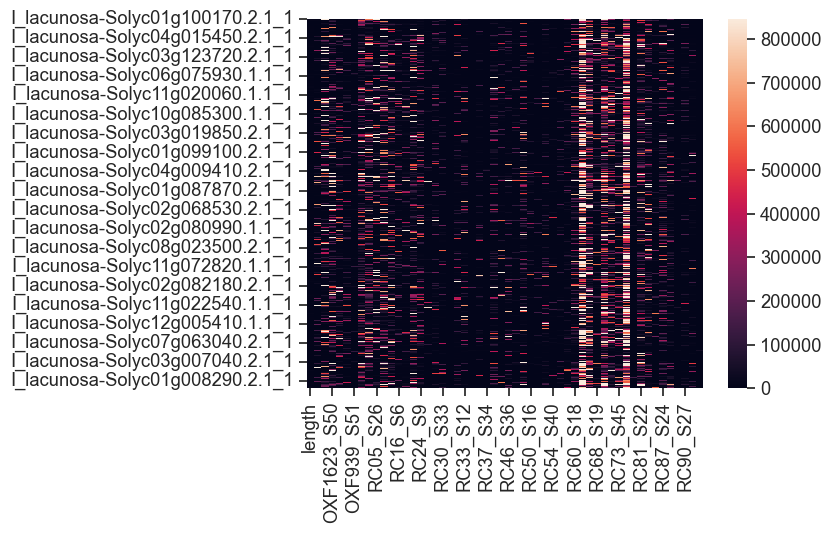

In [105]:
sns.heatmap(df, square=False, robust=True)

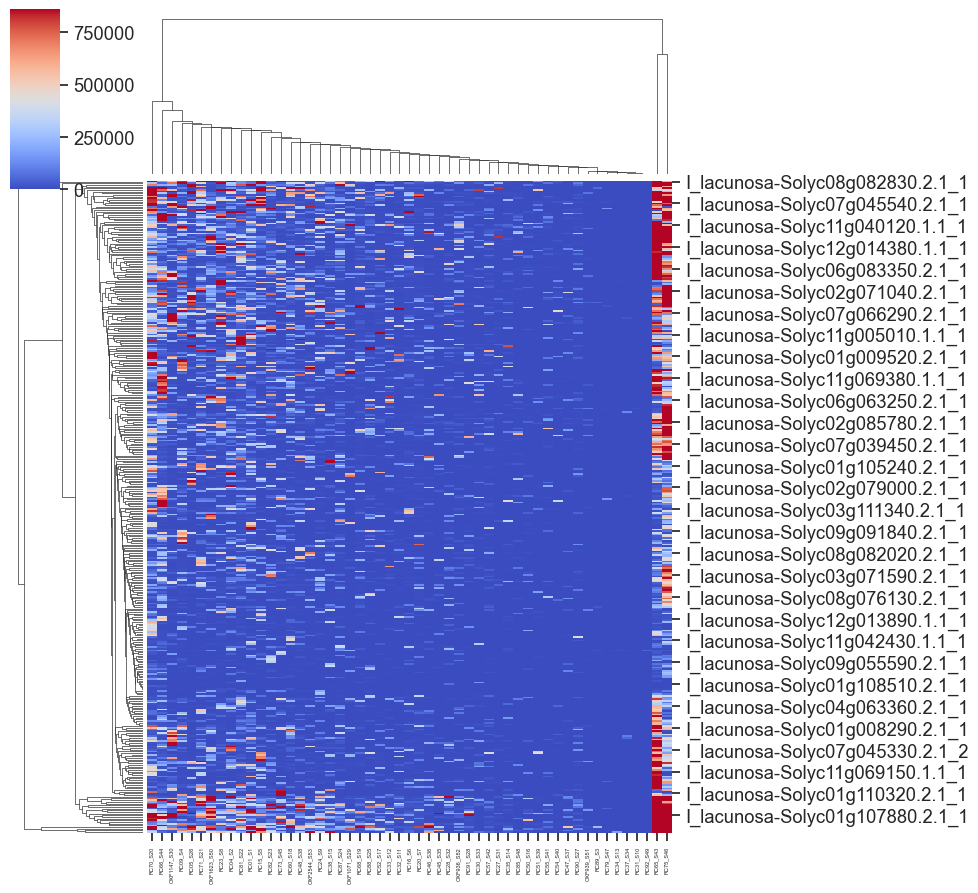

In [169]:
g = sns.clustermap(data=df, cmap = "coolwarm", xticklabels=True, robust=True);
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 4);
plt.savefig("output.png")

### By Average Coverage
Divide all by length

In [3]:
df = pd.read_csv('../Datasets/Ipomoeae_capture.csv', index_col=0)
df = df.drop(columns=['sum', 'Unnamed: 56'])
df.head(3)

,length,OXF1071_S29,OXF1147_S30,OXF1623_S50,OXF2544_S53,OXF936_S52,OXF939_S51,RC01_S1,RC04_S2,RC05_S26,...,RC79_S47,RC81_S22,RC82_S23,RC85_S48,RC87_S24,RC88_S25,RC89_S3,RC90_S27,RC91_S28,RC92_S49
I_lacunosa-Solyc01g100170.2.1_1,4190,266,935299,5565,3132,216,1480,153035,604754,1360304,...,0,17501,23408,1058,5783,161830,0,1243,4097,0
I_lacunosa-Solyc09g091900.2.1_1,2578,1875,3145,2765,2880,624,0,67314,830,548,...,0,4770,50195,296,247873,1383,0,312,1353,0
I_lacunosa-Solyc09g092070.2.1_1,6788,9529,1201,69350,2461,358,880,520687,205968,876,...,0,514037,172624,120869,2551,840,0,9372,3397,0


In [4]:
lengths = df['length'].tolist()

In [5]:
df2 = df.div(lengths, axis='rows')

In [6]:
df2 = df2.drop(columns=['length'])

In [7]:
df2.head(3)

,OXF1071_S29,OXF1147_S30,OXF1623_S50,OXF2544_S53,OXF936_S52,OXF939_S51,RC01_S1,RC04_S2,RC05_S26,RC09_S4,...,RC79_S47,RC81_S22,RC82_S23,RC85_S48,RC87_S24,RC88_S25,RC89_S3,RC90_S27,RC91_S28,RC92_S49
I_lacunosa-Solyc01g100170.2.1_1,0.063484,223.221718,1.328162,0.747494,0.051551,0.353222,36.523866,144.332697,324.654893,2.235084,...,0.0,4.176850,5.586635,0.252506,1.380191,38.622912,0.0,0.296659,0.977804,0.0
I_lacunosa-Solyc09g091900.2.1_1,0.727308,1.219938,1.072537,1.117145,0.242048,0.000000,26.110939,0.321955,0.212568,0.515516,...,0.0,1.850272,19.470520,0.114818,96.149341,0.536462,0.0,0.121024,0.524825,0.0
I_lacunosa-Solyc09g092070.2.1_1,1.403801,0.176930,10.216559,0.362552,0.052740,0.129641,76.706983,30.342958,0.129051,0.753830,...,0.0,75.727313,25.430760,17.806276,0.375810,0.123748,0.0,1.380672,0.500442,0.0


/Users/ckidner/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


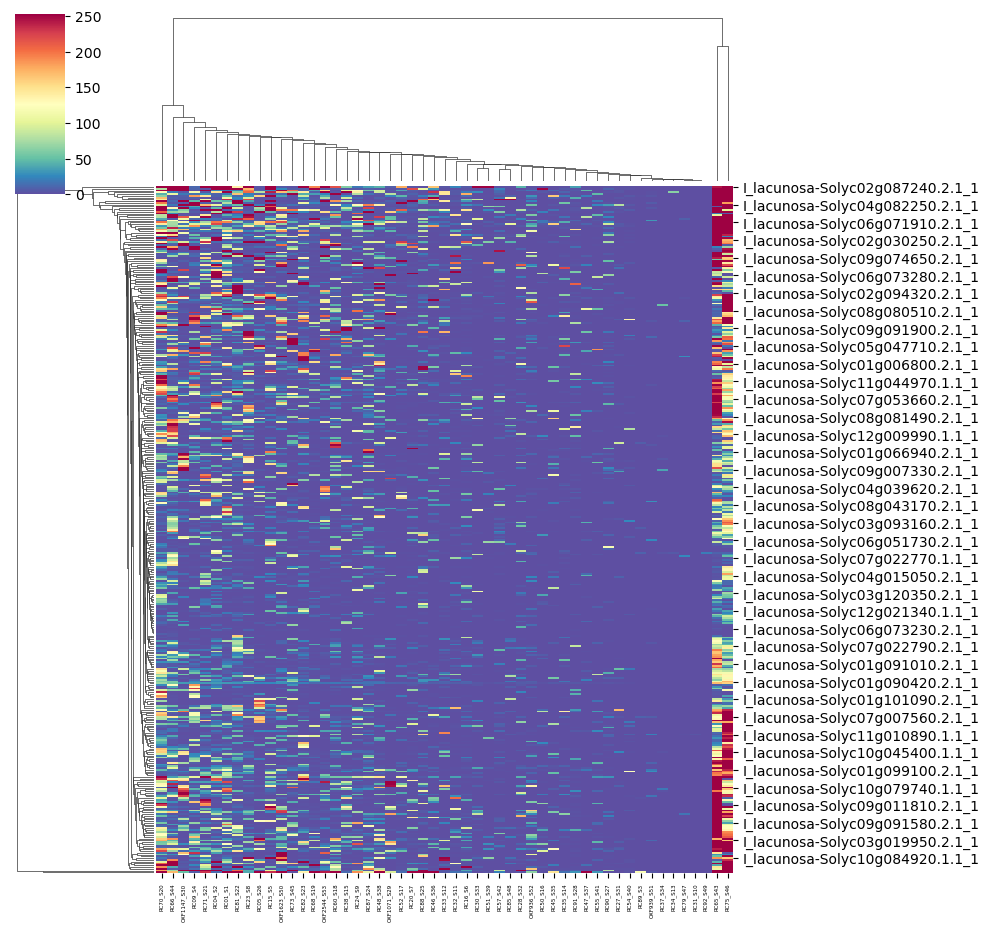

In [8]:
g = sns.clustermap(data=df2, cmap = "Spectral_r", xticklabels=True, robust = True);
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 4);
plt.savefig("output.png")